## **Loading the libraries**

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report

## **Importing the train data**

In [2]:
train = pd.read_csv('training_data.txt', delim_whitespace=True, header=0)
train.head(5)

,subject,activity,F1,F2,F3,F4,F5,F6,F7,F8,...,F552,F553,F554,F555,F556,F557,F558,F559,F560,F561
0,1,5,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,1,5,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,1,5,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,1,5,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,1,5,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


## **Creating a column with 0 for static and 1 for dynamic labels**

In [3]:
activity_names = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LYING', 7: 'STAND_TO_SIT', 8: 'SIT_TO_STAND', 9: 'SIT_TO_LIE', 10: 'LIE_TO_SIT', 11: 'STAND_TO_LIE', 12: 'LIE_TO_STAND'}

# define a dictionary that maps each activity name to its corresponding label
activity_labels = {'WALKING': 'dynamic', 'WALKING_UPSTAIRS': 'dynamic', 'WALKING_DOWNSTAIRS': 'dynamic', 'SITTING': 'static', 'STANDING': 'static', 'LYING': 'static', 'STAND_TO_SIT': 'dynamic', 'SIT_TO_STAND': 'dynamic', 'SIT_TO_LIE': 'dynamic', 'LIE_TO_SIT': 'dynamic', 'STAND_TO_LIE': 'dynamic', 'LIE_TO_STAND': 'dynamic'}

# replace the activity numbers with their corresponding names
train['activity'] = train['activity'].replace(activity_names)

label_names = {'static':0,'dynamic':1}
# replace the activity names with their corresponding labels
train['label'] = train['activity'].replace(activity_labels)
train['label'] = train['label'].replace(label_names)

# print the result
train

,subject,activity,F1,F2,F3,F4,F5,F6,F7,F8,...,F553,F554,F555,F556,F557,F558,F559,F560,F561,label
0,1,STANDING,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,0
1,1,STANDING,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,0
2,1,STANDING,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,...,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,0
3,1,STANDING,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,...,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,0
4,1,STANDING,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,...,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,30,WALKING_UPSTAIRS,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,...,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020,1
7763,30,WALKING_UPSTAIRS,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,...,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252,1
7764,30,WALKING_UPSTAIRS,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,...,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071,1
7765,30,WALKING_UPSTAIRS,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,...,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700,1


## **Pre-Processing - Creating a y_train dataframe with just the labels**

In [4]:
Y_binary_train = train.iloc[:,-1]
Y_binary_train

0       0
1       0
2       0
3       0
4       0
       ..
7762    1
7763    1
7764    1
7765    1
7766    1
Name: label, Length: 7767, dtype: int64

## **Pre-Processing - Dropping the label and activity columns**

In [5]:
X_binary_train = train.drop(columns = ['label', 'activity'])
X_binary_train

,subject,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F552,F553,F554,F555,F556,F557,F558,F559,F560,F561
0,1,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,1,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,1,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,1,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,30,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,...,-0.008381,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020
7763,30,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,...,0.209452,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252
7764,30,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,...,0.237003,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071
7765,30,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,...,0.069366,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700


## **Train and validation set split**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_binary_train, Y_binary_train, test_size=0.2, stratify= Y_binary_train, random_state=42)



## Logistic Regression with Cross Validation

In [7]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

# Making predictions on the test data
y_pred = logreg.predict(X_test)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(logreg, X_train, y_train, cv=kf)
print("Scores = ", scores)
print("Average score: {:.2f}".format(scores.mean()))

# Evaluating the model performance
accuracy = accuracy_score(y_pred, y_test)
print('Validation Accuracy:', accuracy)

y_pred = logreg.predict(X_train)
accuracy = accuracy_score(y_pred, y_train)
print('Training Accuracy:', accuracy)

Scores =  [1.         1.         0.99678457 0.99838969 1.         1.
 0.99516908 0.99677939 0.99838969 1.        ]
Average score: 1.00
Validation Accuracy: 0.9987129987129987
Training Accuracy: 0.9996780943183647


## Logistic Regression with Regularisation

In [8]:
# Create a logistic regression model with L2 regularization
lr = LogisticRegression(penalty='l2', C=1.0)

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict the target values for the testing data
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy)

y_pred = logreg.predict(X_train)
accuracy = accuracy_score(y_pred, y_train)
print('Training Accuracy:', accuracy)

Accuracy: 0.9987129987129987
Training Accuracy: 0.9996780943183647


## Random Forest

In [9]:
rf = RandomForestClassifier(random_state=42)
from sklearn.model_selection import cross_val_predict

# train the model using the training data
rf.fit(X_train, y_train)

# predict on the test data
y_pred = rf.predict(X_test)

# Evaluating the model performance
accuracy = accuracy_score(y_pred, y_test)
print('Validation Accuracy:', accuracy)

y_pred = rf.predict(X_train)
accuracy = accuracy_score(y_pred, y_train)
print('Training Accuracy:', accuracy)

Validation Accuracy: 0.9974259974259975
Training Accuracy: 1.0


## Decision Tree

In [10]:
clf = DecisionTreeClassifier()

# fit the model to the training data
clf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = clf.predict(X_test)

y_test_reshaped = y_test.to_numpy().reshape(-1, 1)

# evaluate the model's accuracy
accuracy = clf.score(X_test, y_test_reshaped)
print("Validation Accuracy:", accuracy)

y_pred = clf.predict(X_train)
accuracy = accuracy_score(y_pred, y_train)
print('Training Accuracy:', accuracy)

Validation Accuracy: 0.9948519948519948
Training Accuracy: 1.0


## Support Vector Machines

In [11]:
svc = SVC(kernel='linear')

# Train the SVC model on the training set
svc.fit(X_train, y_train)

# Predict the class labels of the test set
y_pred = svc.predict(X_test)

y_test_reshaped = y_test.to_numpy().reshape(-1, 1)

# evaluate the model's accuracy
accuracy = clf.score(X_test, y_test_reshaped)
print("Accuracy:", accuracy)

y_pred = svc.predict(X_train)
accuracy = accuracy_score(y_pred, y_train)
print('Training Accuracy:', accuracy)

Accuracy: 0.9948519948519948
Training Accuracy: 1.0


## Multilinear Perceptron

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=10000)

# Train the MLP on the training set
mlp.fit(X_train, y_train)

# Predict the class labels of the test set
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the MLP
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy)

y_pred = mlp.predict(X_train)
accuracy = accuracy_score(y_pred, y_train)
print('Training Accuracy:', accuracy)

Accuracy: 0.9987129987129987
Training Accuracy: 0.9998390471591824


## Emsembling

In [13]:
from sklearn.ensemble import VotingClassifier
# define individual classifiers
clf1 = lr
clf2 = rf
clf3 = mlp

# create ensemble classifier using majority voting
ensemble = VotingClassifier(estimators=[ ('rf', clf2),('logistic', clf1), ('mlp', clf3)], voting='hard')

mlp.fit(X_train, y_train)

# Predict the class labels of the test set
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the MLP
accuracy = accuracy_score(y_pred, y_test)
print('Validation Accuracy:', accuracy)

y_test_reshaped = y_test.to_numpy().reshape(-1, 1)

# train ensemble classifier
ensemble.fit(X_binary_train, Y_binary_train)

# predict using ensemble classifier
y_pred = ensemble.predict(X_binary_train)

# evaluate the model's accuracy
accuracy = accuracy_score(y_pred, Y_binary_train)
print("Train Accuracy:", accuracy)

Validation Accuracy: 0.9987129987129987
Train Accuracy: 1.0


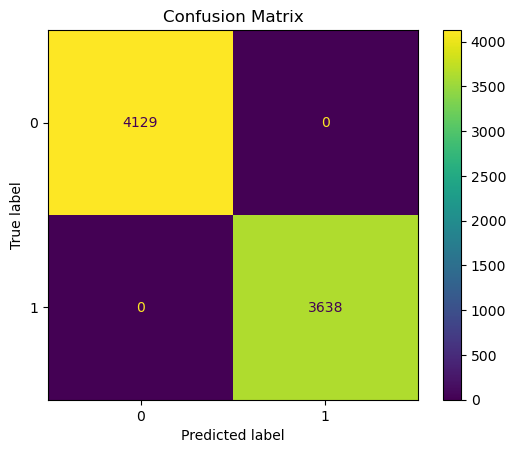

In [14]:
plot_confusion_matrix(ensemble, X_binary_train, Y_binary_train)
plt.title("Confusion Matrix")
plt.show()

## Importing Test Data 

In [15]:
test = pd.read_csv('test_data.txt', delim_whitespace=True, header=0)
test

,subject,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F552,F553,F554,F555,F556,F557,F558,F559,F560,F561
0,2,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,2,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,2,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,2,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,24,0.052279,-0.038687,-0.013494,-0.287933,-0.403601,-0.431550,-0.356012,-0.433826,-0.534817,...,0.125445,-0.390349,-0.752788,-0.337422,0.346295,0.884904,-0.698885,-0.652416,0.274605,0.190104
3158,24,0.073745,-0.024673,-0.017836,-0.305455,-0.286487,-0.417996,-0.373468,-0.354849,-0.557925,...,0.150787,-0.336001,-0.703532,-0.736701,-0.372889,-0.657421,0.322548,-0.655858,0.273556,0.187748
3159,24,0.068334,0.043822,-0.024135,-0.329706,-0.335273,-0.456965,-0.387944,-0.423504,-0.604403,...,-0.004765,-0.139894,-0.476335,-0.181560,0.088574,0.696664,0.363139,-0.656034,0.274457,0.186527
3160,24,0.023016,0.032345,-0.011830,-0.323182,-0.465502,-0.426108,-0.392307,-0.520848,-0.569571,...,0.013540,-0.224141,-0.623083,0.444558,-0.819188,0.929294,-0.008398,-0.660387,0.264759,0.192865


## Making Predictions on Test data

In [16]:
predictions = ensemble.predict(test)

with open('binary_such1.txt', 'w') as file:
    for prediction in predictions:
        file.write(str(prediction) + '\n')
file.close()
len(predictions)

3162